In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as T
import itertools

In [15]:
dat=np.loadtxt('Halo_list_NO_FOFR_1000.txt')

min_x = np.min(dat[:,0]) 
max_x = np.max(dat[:,0])
min_y = np.min(dat[:,1]) 
max_y = np.max(dat[:,1])
min_z = np.min(dat[:,2])
max_z = np.max(dat[:,2])

print("el valor mínimo en x es", min_x)
print("el valor máximo en x es", max_x)

print("el valor mínimo en x es", min_y)
print("el valor máximo en x es", max_y)   


print("el valor mínimo en x es", min_z)
print("el valor máximo en x es", max_z)

el valor mínimo en x es 0.033786
el valor máximo en x es 999.966125
el valor mínimo en x es 0.040336
el valor máximo en x es 999.954712
el valor mínimo en x es 0.054647
el valor máximo en x es 999.976807


In [12]:
dat.shape

(616457, 4)

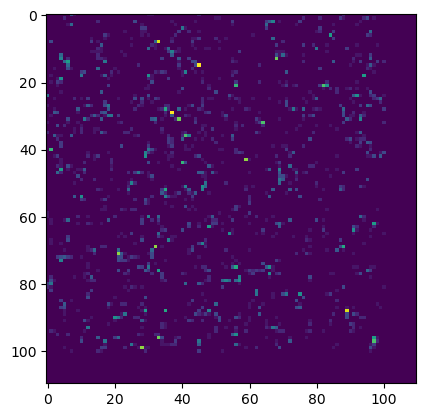

In [30]:
dat_n = dat/10
num_dat = dat.shape[0]

x=np.zeros((110,110,110))
for t in range(num_dat):
    i,j,k=np.round(dat_n[t,:3])
    x[int(i),int(j),int(k)]+=1

plt.imshow(x[:,0,:])

In [20]:
dat.shape[0]

616457